# 라이브러리 설치

In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.4 MB/s eta 0:00:00


In [2]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
!pip install --upgrade lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


# 경로 설정 및 라이브러리 로드

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_PATH = '/content/drive/MyDrive/sk쉴더스/프로젝트2_PS_S3_E6'
%cd {DATA_PATH}

/content/drive/MyDrive/sk쉴더스/프로젝트2_PS_S3_E6


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 로드

In [7]:
train = pd.read_csv('data/train.csv', index_col='id')
test = pd.read_csv('data/test.csv', index_col='id')
submission = pd.read_csv('data/sample_submission.csv')

In [8]:
original = pd.read_csv('data/ParisHousing.csv')

In [9]:
train.shape, test.shape, original.shape

((22730, 17), (15154, 16), (10000, 17))

# 데이터 분석 및 EDA

## 컬럼별 값 분포 확인

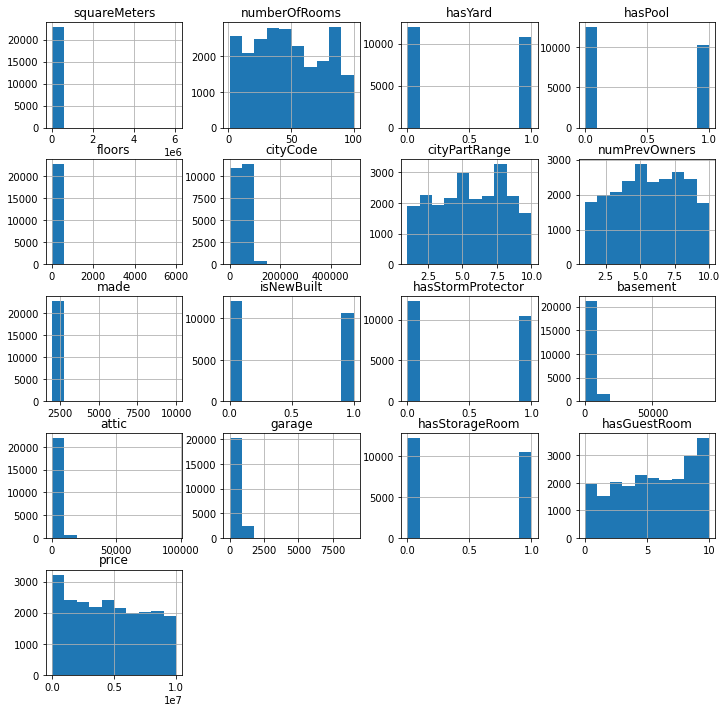

In [10]:
train.hist(figsize=(12, 12));

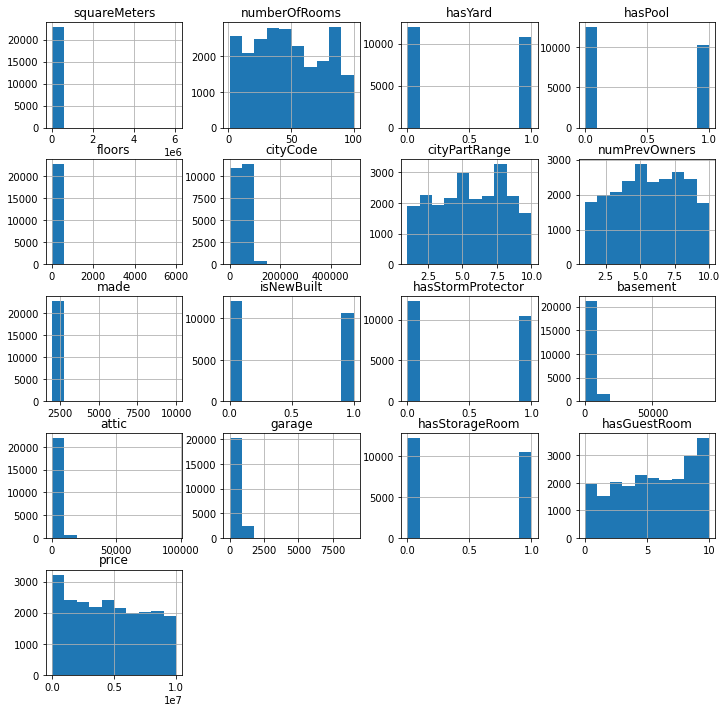

In [11]:
train.hist(figsize=(12, 12));

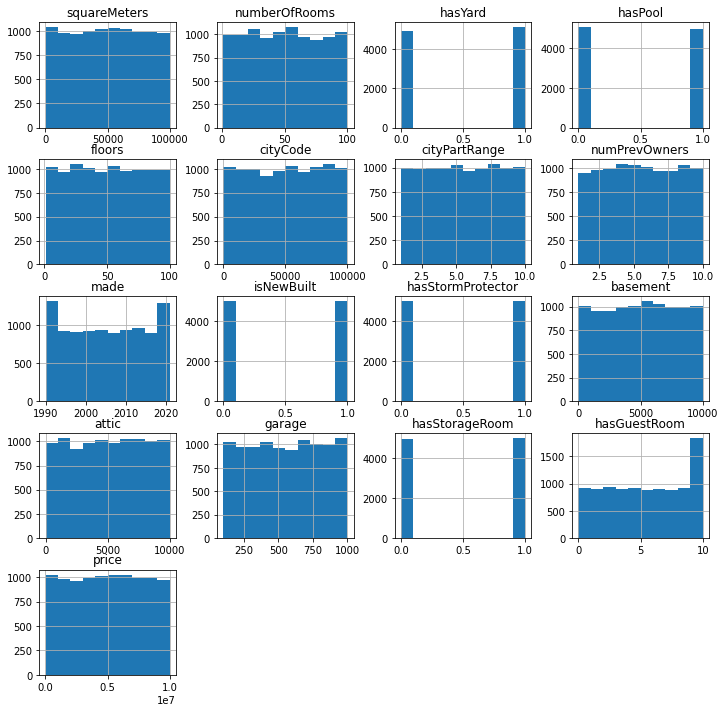

In [12]:
original.hist(figsize=(12, 12));

## 컬럼과 타겟값과의 관계 확인

### 다락방과 타겟값

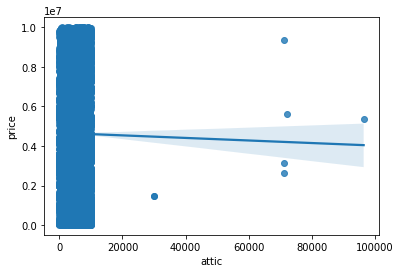

In [13]:
import seaborn as sns
x = train['attic']
y = train['price']
sns.regplot(x=x, y=y);

### 도시코드와 타겟값

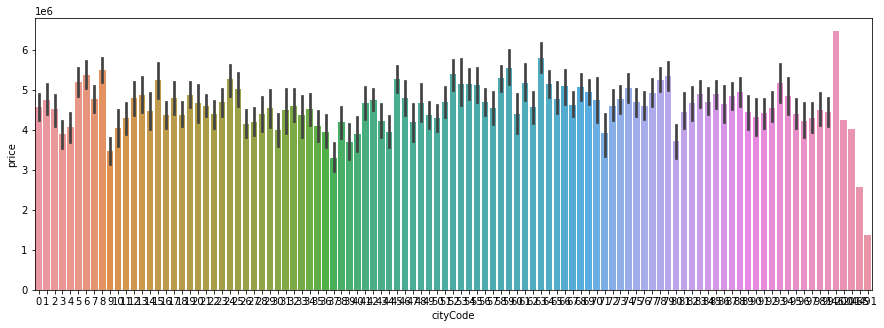

In [14]:
x = train['cityCode'].apply(lambda x:x // 1000)
y = train['price']
plt.figure(figsize=(15, 5))
sns.barplot(x=x, y=y);

### 방 수와 타겟값

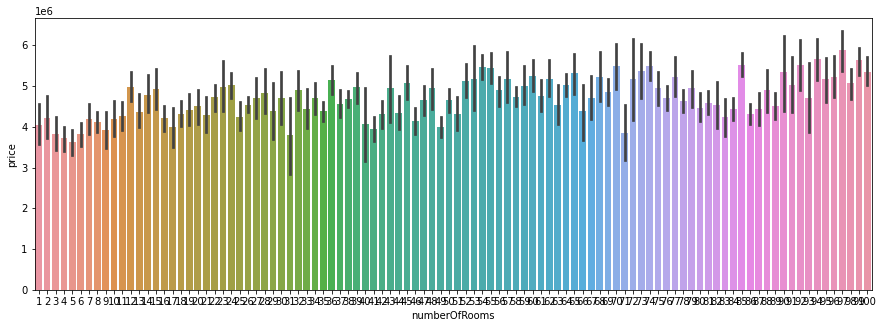

In [15]:
x = train['numberOfRooms']
y = train['price']
plt.figure(figsize=(15, 5))
sns.barplot(x=x, y=y);

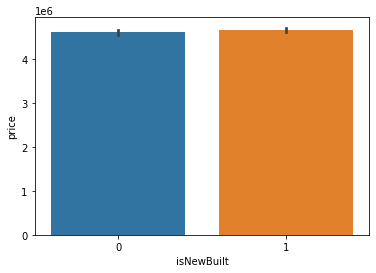

In [16]:
x = train['isNewBuilt']
y = train['price']
sns.barplot(x=x, y=y);

### 평수와 타겟값

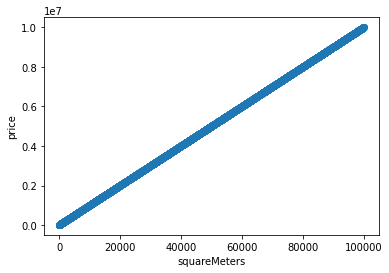

In [17]:
x = original['squareMeters']
y = original['price']
sns.regplot(x=x, y=y);

# 피처 엔지니어링

## 데이터 합치기

In [18]:
train = pd.concat([train , original], sort=False)

In [19]:
df = pd.concat([train, test], ignore_index=True)

## 이상치 처리

- 이상치 제외 최댓값으로 대체

In [20]:
df.squareMeters.sort_values(ascending=False)

15334    6071330
4741      146181
35969      99999
28368      99999
13686      99985
          ...   
39673         89
5763          89
12130         89
14879         89
40385         69
Name: squareMeters, Length: 47884, dtype: int64

In [21]:
dict = {6071330 :99999 ,146181:99999 }
df = df.replace({"squareMeters": dict})

In [22]:
df.floors.sort_values(ascending=False)

5659     6000
248       100
7170      100
31792     100
40119     100
         ... 
32295       1
37983       1
37976       1
26223       1
23942       1
Name: floors, Length: 47884, dtype: int64

In [23]:
dict = {6000 : 100}
df=df.replace({"floors": dict})

In [24]:
df.made.sort_values(ascending=False)[:10]

19748    10000
21400    10000
2113     10000
3608     10000
19124    10000
6744      2021
22739     2021
31540     2021
22732     2021
29641     2021
Name: made, dtype: int64

In [25]:
dict = { 10000 : 2021 }
df=df.replace({"made": dict})

In [26]:
df.basement.sort_values(ascending=False)[:10]

15068    91992
18926    91978
43921    89016
34519    84333
2107     84333
3995     81851
33426    26132
1433     10000
816      10000
174      10000
Name: basement, dtype: int64

In [27]:
dict = { 91992 : 10000 , 91978 : 10000 ,
        89016 : 10000, 26132 : 10000,
        84333 : 10000  , 81851 :10000 }
df=df.replace({"basement": dict})

In [28]:
df.attic.sort_values(ascending=False)[:20]

13633    96381
17168    71965
12858    71024
4909     71001
3828     71001
35568    38535
19994    30000
13642    30000
41878    30000
47499    13779
9864     10000
28637    10000
13347    10000
833      10000
9115     10000
14162    10000
8956     10000
37622    10000
5991     10000
2014     10000
Name: attic, dtype: int64

In [29]:
dict = { 96381 : 10000, 
         71965 : 10000 , 
         71024 : 10000, 
         71001 : 10000 ,
        38535 : 10000,
         30000 : 10000,
        13779 : 10000
       }
df=df.replace({"attic": dict})

In [30]:
df.garage.sort_values(ascending=False)[:10]

17629    9017
14878    2048
22384    1000
6042     1000
38734    1000
44446    1000
15703    1000
2699     1000
34481    1000
42272    1000
Name: garage, dtype: int64

In [31]:
dict = { 2048 : 1000, 
         9017 : 1000
       }
df=df.replace({"garage": dict})

In [32]:
df.garage.sort_values(ascending=False)[:10]

22384    1000
21860    1000
44438    1000
45024    1000
6042     1000
38734    1000
44446    1000
15703    1000
2699     1000
34481    1000
Name: garage, dtype: int64

### 이상치 처리 후 분포 확인

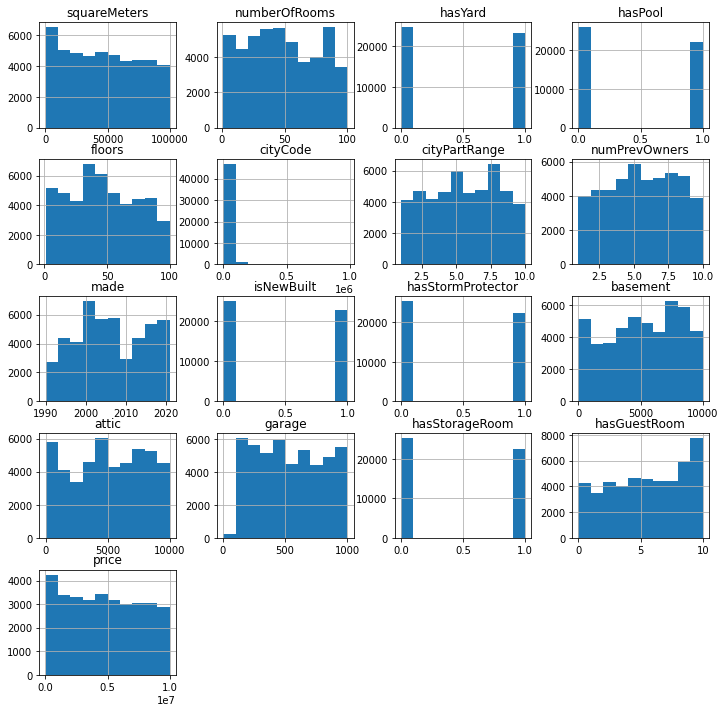

In [33]:
df.hist(figsize=(12, 12));

## 도시코드 처리

- 고윳값이 너무 많아 맨 앞자리 두자리만 사용

In [34]:
df['cityCode2'] = df['cityCode'].apply(lambda x: f'{str(x):>05}')

In [35]:
df[df['cityCode'] < 1000]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,cityCode2
100,35634,99,1,1,56,426,7,8,1998,0,0,7089,9651,418,0,2,3568972.8,00426
119,56093,16,0,1,20,694,6,8,2015,1,1,815,4583,114,0,3,5612610.5,00694
166,80610,75,1,1,21,877,4,4,2007,1,1,2420,5092,677,0,0,8071729.7,00877
251,78671,88,0,0,79,426,5,2,2013,0,0,2426,1256,948,0,3,7868709.3,00426
290,63416,89,1,0,51,365,9,8,2016,0,1,3389,579,957,1,4,6347507.6,00365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47338,7608,99,0,1,6,693,5,9,2019,1,0,9453,7784,991,0,8,NaN,00693
47394,15734,18,0,0,26,426,6,1,2003,1,1,8181,9374,253,0,8,NaN,00426
47448,38633,54,0,1,12,693,9,7,2014,0,0,3486,1069,424,1,5,NaN,00693
47672,5329,56,0,0,50,878,7,8,1994,0,0,2445,5184,930,1,9,NaN,00878


In [36]:
df['cityCode_start'] = df['cityCode2'].astype(str).str[:2]

### Ordinal Encoding

In [37]:
from sklearn.preprocessing import OrdinalEncoder
df['cityCode_start'] = OrdinalEncoder().fit_transform(df[['cityCode_start']])

In [38]:
df.drop(columns=['cityCode', 'cityCode2'], inplace=True)

In [39]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'cityCode_start'],
      dtype='object')

## 방 수 파생피처 생성

In [40]:
df['rooms'] = df['numberOfRooms'] + df['hasGuestRoom']

# 모델 구축 및 예측

In [41]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 나누기

In [42]:
train = df[~df['price'].isna()]
test = df[df['price'].isna()].drop(['price'], axis=1)

In [43]:
X = train.drop(['price'], axis=1)
y = train['price']

In [44]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.25, random_state = 123)

## XGBoost 베이스라인

In [45]:
from xgboost import XGBRegressor
reg=XGBRegressor(max_depth=3, learning_rate=0.25 , n_estimators=500, objective='reg:squarederror', booster='gbtree')
 
reg.fit(train_X, train_y)
prediction=reg.predict(test_X)

In [46]:
mse = mean_squared_error(test_y, prediction)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  17881621847.780354
RMSE:  133722.1815847332


In [47]:
submission['price'] = reg.predict(test)
submission.to_csv('submission_xgboost.csv', index=False)

## 피처 중요도

- 평수의 중요도가 너무 높아 제외하고 시각화

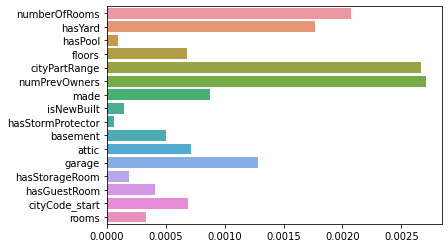

In [48]:
sns.barplot(x=reg.feature_importances_[1:], y=train_X.columns[1:]);

## 교차 검증

In [49]:
from sklearn.model_selection import KFold

regs = []

In [50]:
def make_kfold(model):
  kfolds = KFold(n_splits=5, random_state=1, shuffle=True)
  for train_idx, val_idx in kfolds.split(train):
    X_train = X.iloc[train_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val = y.iloc[val_idx]

    model.fit(X_train, y_train, 
              early_stopping_rounds=10,
              eval_set=[(X_train, y_train), (X_val, y_val)],
              eval_metric='rmse',
              verbose=100)
  
    regs.append(model)

In [51]:
xgb_params = {
    'max_depth':4, 
    'learning_rate':0.25 , 
    'n_estimators':500, 
    'objective':'reg:squarederror', 
    'booster':'gbtree'
}

In [52]:
xgb_reg = XGBRegressor(**xgb_params)
make_kfold(xgb_reg)

[0]	validation_0-rmse:4184390.58958	validation_1-rmse:4161428.05958


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[56]	validation_0-rmse:68982.05605	validation_1-rmse:179957.20485
[0]	validation_0-rmse:4188031.69368	validation_1-rmse:4148209.82363
[27]	validation_0-rmse:138596.10530	validation_1-rmse:157369.71356
[0]	validation_0-rmse:4170282.27932	validation_1-rmse:4220721.05090
[36]	validation_0-rmse:100911.58558	validation_1-rmse:115080.23677
[0]	validation_0-rmse:4174729.72746	validation_1-rmse:4202261.59189
[30]	validation_0-rmse:115271.87884	validation_1-rmse:145274.44313
[0]	validation_0-rmse:4183320.93509	validation_1-rmse:4167729.08279
[29]	validation_0-rmse:105939.54039	validation_1-rmse:172835.58934


In [53]:
xgb_rmse = []
for reg in regs[-9:]:
  xgb_rmse.append(np.sqrt(test_y, reg.predict(test_X)))
print(f'XGBoost RMSE: {np.mean(xgb_rmse)}')

XGBoost RMSE: 2036.9407958984375


In [54]:
y_subs = []
for reg in regs:
  y_subs.append(reg.predict(test))
y_sub = np.mean(y_subs, axis=0)

In [55]:
submission['price'] = y_sub
submission.to_csv('submission_blending.csv', index=False)

In [56]:
submission.head(5)

,id,price
0,22730,4744403.0
1,22731,6178579.0
2,22732,9015846.0
3,22733,1660565.5
4,22734,6775314.5


# 결과

- 도시코드를 사용해보려 했으나 도시코드를 사용하지 않고 구축한 모델의 예측 성능이 가장 좋았다

1. XGBoost, 도시코드 컬럼 제외 : 102008 (34등)
2. XGBoost, 도시코드 컬럼 사용 : 143784 (163등)
3. XGBoost 블렌딩, 도시코드 컬럼 사용 : 204749 (..등)